In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Theme agar grafik terlihat rapi & modern
px.defaults.template = "plotly_white"
px.defaults.color_continuous_scale = "Blues"

# Load data
df = pd.read_excel("data_kuesioner.xlsx")
question_cols = [col for col in df.columns if col.startswith("Q")]

df.head()


,Partisipan,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,1,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
1,2,S,S,S,S,S,S,S,S,CS,S,S,S,S,S,S,S,S
2,3,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS
3,4,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S
4,5,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS


## 2. BAR CHART

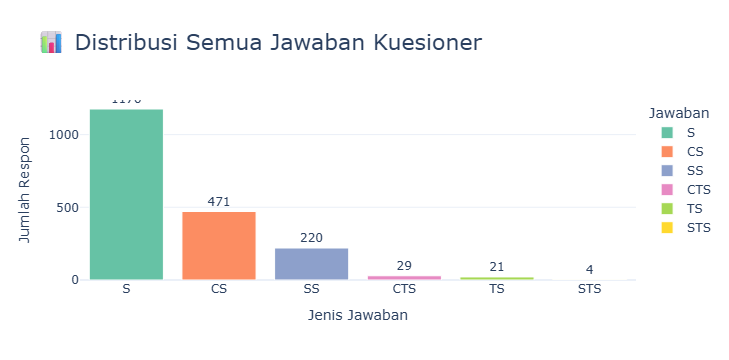

In [3]:
# Hitung distribusi semua jawaban
all_counts = df[question_cols].stack().value_counts().reset_index()
all_counts.columns = ["Jawaban", "Jumlah"]

# BAR CHART
fig_bar = px.bar(
    all_counts,
    x="Jawaban",
    y="Jumlah",
    color="Jawaban",
    text="Jumlah",
    title="📊 Distribusi Semua Jawaban Kuesioner",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig_bar.update_layout(
    title_font_size=22,
    xaxis_title="Jenis Jawaban",
    yaxis_title="Jumlah Respon",
)
fig_bar.update_traces(textposition="outside", marker=dict(line=dict(width=1)))
fig_bar.show()


## 3. PIE CHART

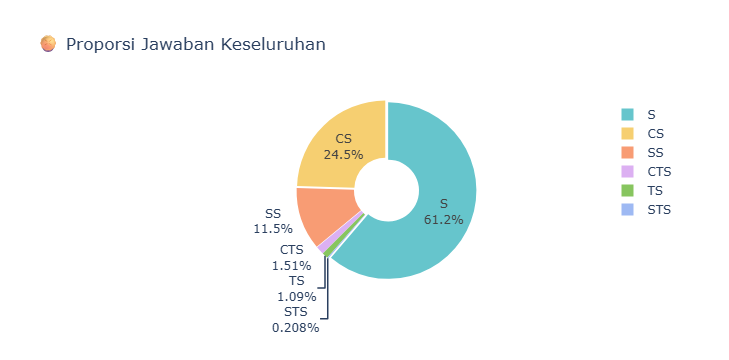

In [4]:
fig_pie = px.pie(
    all_counts,
    names="Jawaban",
    values="Jumlah",
    hole=0.35,
    title="🥧 Proporsi Jawaban Keseluruhan",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig_pie.update_traces(textinfo="percent+label", pull=[0.02]*len(all_counts))
fig_pie.show()


## 4. STACKED BAR

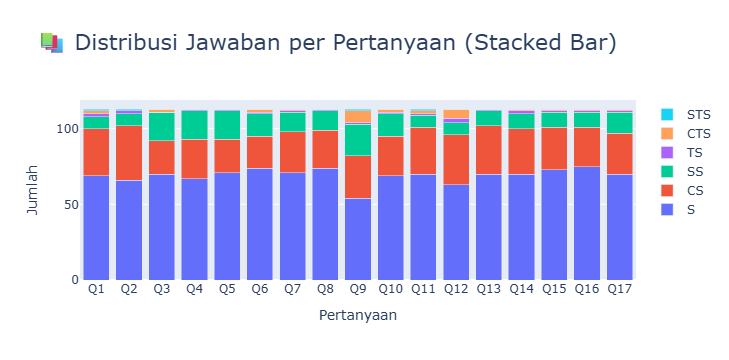

In [5]:
stack_data = pd.DataFrame()

# Menyusun data
for q in question_cols:
    temp = df[q].value_counts().rename(q)
    stack_data = pd.concat([stack_data, temp], axis=1)

stack_data = stack_data.fillna(0)

# Plot
fig_stack = go.Figure()

for label in stack_data.index:
    fig_stack.add_trace(go.Bar(
        name=label,
        x=stack_data.columns,
        y=stack_data.loc[label],
    ))

fig_stack.update_layout(
    barmode="stack",
    title="📚 Distribusi Jawaban per Pertanyaan (Stacked Bar)",
    title_font_size=22,
    xaxis_title="Pertanyaan",
    yaxis_title="Jumlah"
)

fig_stack.show()


## 5. RATA-RATA SKOR TIAP PERTANYAAN

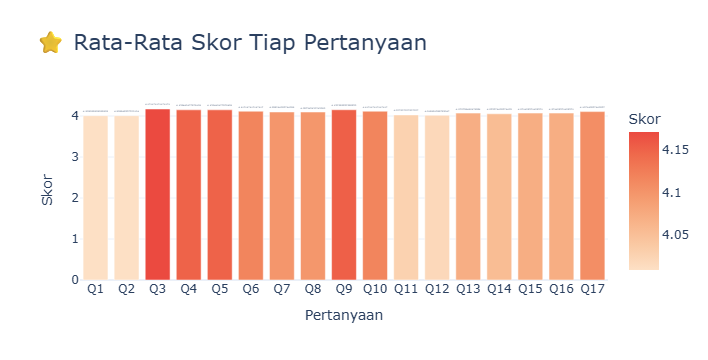

In [10]:
import pandas as pd
import plotly.express as px

# Aktifkan mode aman Pandas (hindari warning replace)
pd.set_option('future.no_silent_downcasting', True)

# Mapping skala ke angka
mapping = {
    "SS": 5,
    "S": 4,
    "CS": 4,
    "N": 3,
    "TS": 2,
    "STS": 1
}

# Replace nilai → angka + aman dari error
df_numeric = (
    df[question_cols]
    .replace(mapping)                # ubah teks ke angka
    .infer_objects(copy=False)       # hindari warning
    .apply(pd.to_numeric, errors="coerce")   # jika ada nilai aneh → NaN
)

# Hitung rata-rata tiap kolom
mean_scores = df_numeric.mean(axis=0).reset_index()
mean_scores.columns = ["Pertanyaan", "Skor"]

# Buat grafik
fig_mean = px.bar(
    mean_scores,
    x="Pertanyaan",
    y="Skor",
    text="Skor",
    title="⭐ Rata-Rata Skor Tiap Pertanyaan",
    color="Skor",
    color_continuous_scale="Peach"
)

fig_mean.update_traces(textposition="outside")
fig_mean.update_layout(title_font_size=22)
fig_mean.show()


## 6. POSITIF • NETRAL • NEGATIF – BAR CHART

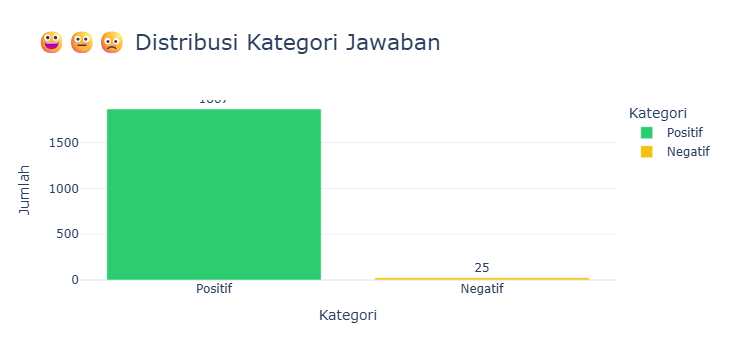

In [11]:
kategori_map = {
    "SS": "Positif", "S": "Positif", "CS": "Positif",
    "N": "Netral",
    "TS": "Negatif", "STS": "Negatif"
}

flat = df[question_cols].stack().map(kategori_map)
kategori_counts = flat.value_counts().reset_index()
kategori_counts.columns = ["Kategori", "Jumlah"]

fig_kat = px.bar(
    kategori_counts,
    x="Kategori",
    y="Jumlah",
    color="Kategori",
    text="Jumlah",
    title="😀😐🙁 Distribusi Kategori Jawaban",
    color_discrete_sequence=["#2ecc71", "#f1c40f", "#e74c3c"]
)

fig_kat.update_traces(textposition="outside")
fig_kat.update_layout(title_font_size=22)
fig_kat.show()


## 7. BONUS – Radar Chart Rata-Rata Skor

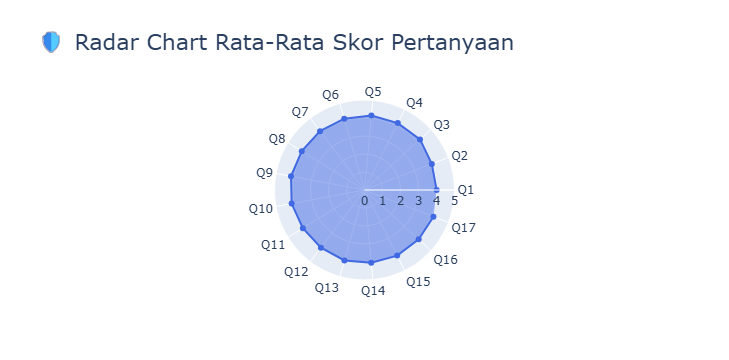

In [12]:
fig_radar = go.Figure()

fig_radar.add_trace(go.Scatterpolar(
    r=mean_scores["Skor"],
    theta=mean_scores["Pertanyaan"],
    fill="toself",
    line=dict(color="royalblue")
))

fig_radar.update_layout(
    title="🛡️ Radar Chart Rata-Rata Skor Pertanyaan",
    polar=dict(radialaxis=dict(visible=True, range=[0, 5])),
    title_font_size=22
)

fig_radar.show()
